In [58]:
import numpy as np
from Functions import *
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, TSNE
from sklearn.datasets import load_digits
from sklearn import random_projection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import rbf_kernel
from tqdm import tqdm

def dist(pt1,pt2):
    return np.linalg.norm(pt1-pt2)

def minmaxdist(pt, pts):
    dists = [dist(pt,pts[i]) for i in range(len(pts))]
    return np.array([min(dists), max(dists)])

def diam(pts):
    return max(pdist(pts, metric='euclidean'))

def make_outlier_vis(dim, percluster, num_outliers, far=10):

    X,y = randomGaussians2(d=dim, nper=percluster, scaling=1)
    # introducing a single outlier

    #X = X[percluster+1:]

    for i in range(num_outliers):
        random_vector = np.random.normal(size=dim)
        unit_vector = diam(X)*(far)*random_vector / np.linalg.norm(random_vector)

        
        #print(np.linalg.norm(unit_vector))
        #print(unit_vector.shape)
        #print(X.shape)
        X = np.concatenate((X, np.array([random_vector])), axis=0)

    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    X_pca = pca.fit_transform(X)


    tsne = TSNE(n_components=2, random_state=42, method='exact', perplexity=30)
    X_tsne = tsne.fit_transform(X)

    #distance_matrix = squareform(pdist(X, metric='euclidean'))
    #P = BASIC_P(distance_matrix,0)
    #X_tsne, loss_curve, radius_curve, Z_curve = tsne_(P, no_dims=2, max_iter=1000, simple_grad=False)

    mds = MDS(n_components=2)  # Reduce to 2 dimensions for visualization
    X_mds = mds.fit_transform(X)

    if num_outliers == 1:
        ab = np.array(minmaxdist(X[:-2], X[-1]))
        ab /= diam(X[:-2])
    else:
        ab = None

    return X_mds, X_pca, X_tsne, ab

def make_outlier_config2(dim, percluster, far, method):
    
    X,y = randomGaussians2(d=dim, nper=percluster, scaling=1)

    random_vector = np.random.normal(size=dim)
    vec = diam(X)*(far)*random_vector / np.linalg.norm(random_vector)
    X = np.concatenate((X, np.array([vec])), axis=0)

    ab_orig = minmaxdist(X[-1], X[:-1])/diam(X[:-1])

    if method=='TSNE':
        tsne = TSNE(n_components=2, random_state=42, method='exact', perplexity=30)
        X_new = tsne.fit_transform(X)
    elif method=='PCA':
        pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
        X_new = pca.fit_transform(X)
    else: # method =='mds':
        mds = MDS(n_components=2)  # Reduce to 2 dimensions for visualization
        X_new = mds.fit_transform(X)

    ab_new = minmaxdist(X_new[-1], X_new[:-1])/diam(X_new[:-1])

    return ab_orig, ab_new




In [44]:
### PUTTING IT ALL TOGETHER

percluster=10
num_outliers = 1

X_mds1, X_pca1, X_tsne1, ab1 = make_outlier_vis(10, percluster, num_outliers,far=5)
X_mds2, X_pca2, X_tsne2, ab2 = make_outlier_vis(50, percluster, num_outliers,far=5)
X_mds3, X_pca3, X_tsne3, ab3 = make_outlier_vis(200, percluster, num_outliers,far=5)


hello
hello
hello


100%|██████████| 99/99 [00:02<00:00, 45.64it/s]


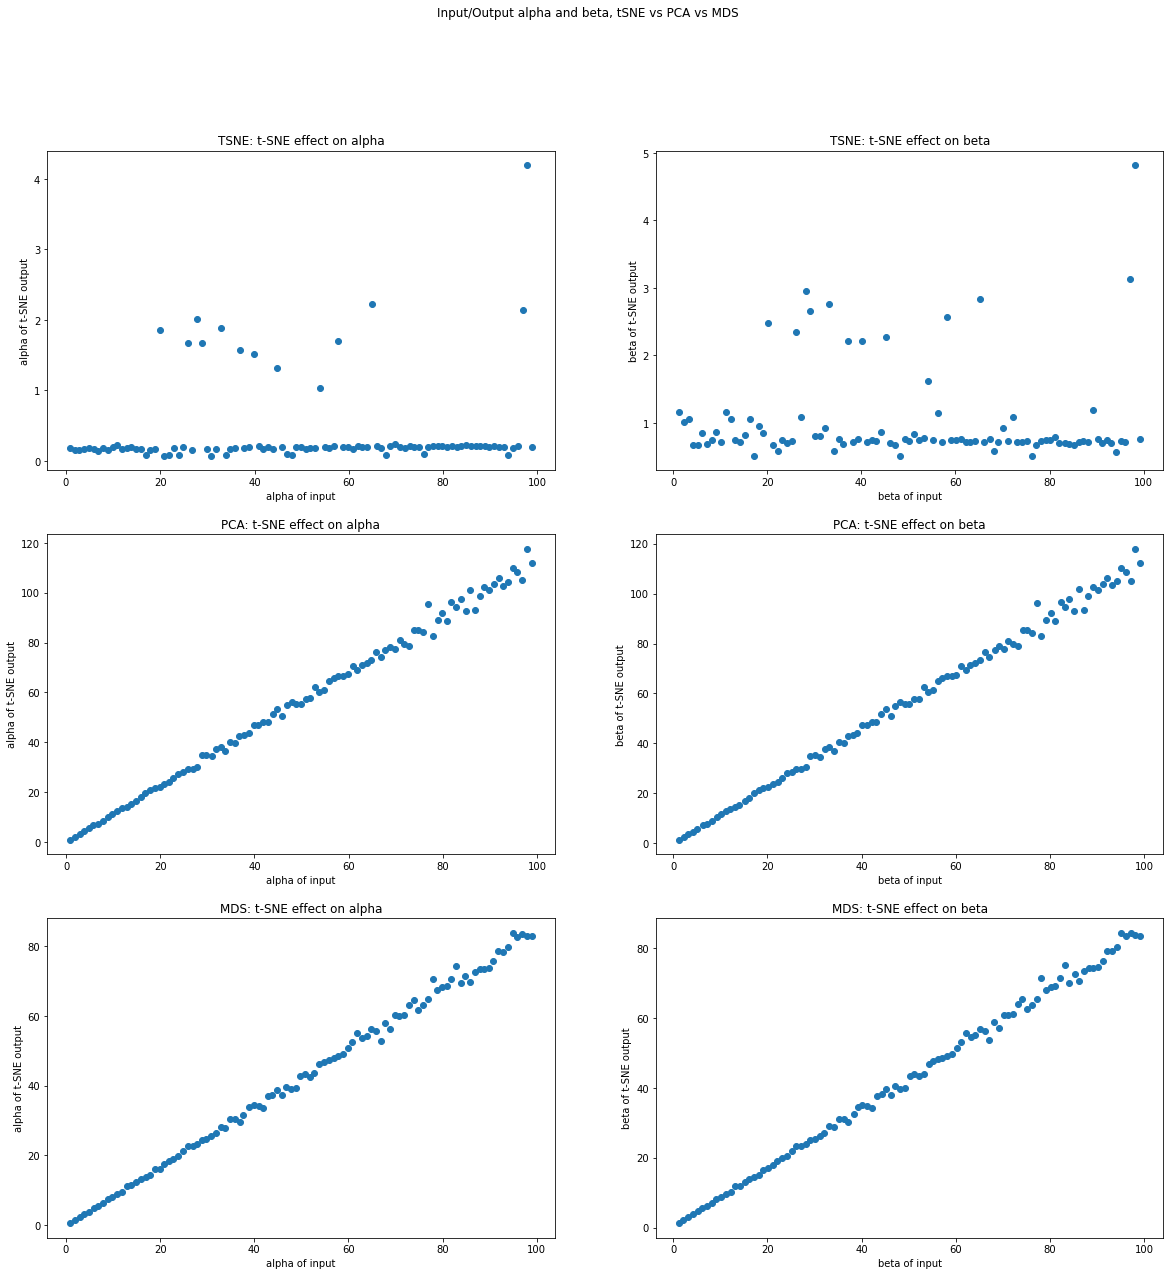

In [59]:
methods = ['TSNE', 'PCA', 'MDS']
fig, axs = plt.subplots(len(methods), 2, figsize=(20,20))

for i in range(len(methods)):

    alpha_in = []
    alpha_out = []

    beta_in = []
    beta_out = []


    for f in tqdm(range(1,100)):

        percluster=20
        ab_orig, ab_tsne = make_outlier_config2(30, percluster, far=f, method = methods[i])
        alpha_in.append(ab_orig[0])
        alpha_out.append(ab_tsne[0])

        beta_in.append(ab_orig[1])
        beta_out.append(ab_tsne[1])

    #plt.xlim(0,2)
    #plt.ylim(0,2)


    axs[i,0].scatter(alpha_in,alpha_out)
    axs[i,0].set_title(methods[i]+': t-SNE effect on alpha')
    axs[i,0].set_xlabel('alpha of input')
    axs[i,0].set_ylabel('alpha of t-SNE output')

    axs[i,1].scatter(beta_in,beta_out)
    axs[i,1].set_title(methods[i]+': t-SNE effect on beta')
    axs[i,1].set_xlabel('beta of input')
    axs[i,1].set_ylabel('beta of t-SNE output')


#fig.tight_layout()
fig.suptitle('Input/Output alpha and beta, tSNE vs PCA vs MDS')
#for ax, row in zip(axs[:,0], methods):
#    ax.set_ylabel(row, labelpad=15,rotation=0, size='x-large')

plt.savefig('visuals/alpha_beta_plot.png')



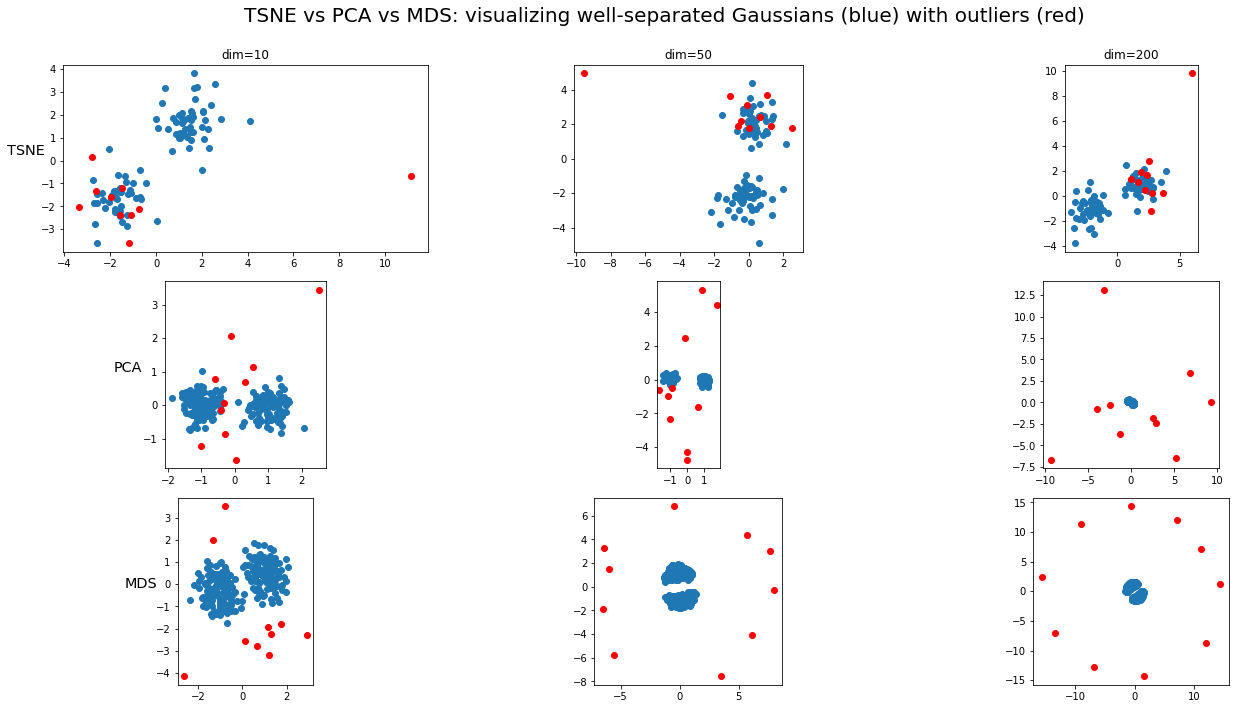

In [38]:

fig, axs = plt.subplots(3, 3, figsize=(20,10))

# MDS
axs[2,0].scatter(X_mds1[:-num_outliers, 0], X_mds1[:-num_outliers, 1])
axs[2,0].scatter(X_mds1[-num_outliers:, 0], X_mds1[-num_outliers:, 1],c='r')
axs[2,0].set_aspect('equal')

axs[2,1].scatter(X_mds2[:-num_outliers, 0], X_mds2[:-num_outliers, 1])
axs[2,1].scatter(X_mds2[-num_outliers:, 0], X_mds2[-num_outliers:, 1],c='r')
axs[2,1].set_aspect('equal')

axs[2,2].scatter(X_mds3[:-num_outliers, 0], X_mds3[:-num_outliers, 1])
axs[2,2].scatter(X_mds3[-num_outliers:, 0], X_mds3[-num_outliers:, 1],c='r')
axs[2,2].set_aspect('equal')


# PCA
axs[1,0].scatter(X_pca1[:-num_outliers, 0], X_pca1[:-num_outliers, 1])
axs[1,0].scatter(X_pca1[-num_outliers:, 0], X_pca1[-num_outliers:, 1],c='r')
axs[1,0].set_aspect('equal')

axs[1,1].scatter(X_pca2[:-num_outliers, 0], X_pca2[:-num_outliers, 1])
axs[1,1].scatter(X_pca2[-num_outliers:, 0], X_pca2[-num_outliers:, 1],c='r')
axs[1,1].set_aspect('equal')

axs[1,2].scatter(X_pca3[:-num_outliers, 0], X_pca3[:-num_outliers, 1])
axs[1,2].scatter(X_pca3[-num_outliers:, 0], X_pca3[-num_outliers:, 1],c='r')
axs[1,2].set_aspect('equal')

# TSNE
axs[0,0].scatter(X_tsne1[:-num_outliers, 0], X_tsne1[:-num_outliers, 1])
axs[0,0].scatter(X_tsne1[-num_outliers:, 0], X_tsne1[-num_outliers:, 1],c='r')
axs[0,0].set_aspect('equal')

axs[0,1].scatter(X_tsne2[:-num_outliers, 0], X_tsne2[:-num_outliers, 1])
axs[0,1].scatter(X_tsne2[-num_outliers:, 0], X_tsne2[-num_outliers:, 1],c='r')
axs[0,1].set_aspect('equal')

axs[0,2].scatter(X_tsne3[:-num_outliers, 0], X_tsne3[:-num_outliers, 1])
axs[0,2].scatter(X_tsne3[-num_outliers:, 0], X_tsne3[-num_outliers:, 1],c='r')
axs[0,2].set_aspect('equal')

cols = ['dim=10', 'dim=50', 'dim=200']
rows = ['TSNE', 'PCA', 'MDS']


for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, labelpad=15,rotation=0, size='x-large')

fig.tight_layout()
fig.suptitle('TSNE vs PCA vs MDS: visualizing well-separated Gaussians (blue) with outliers (red)', fontsize=20)
plt.subplots_adjust(top=0.9)

plt.savefig('visuals/outlier_detection.png')



In [39]:
# alpha and beta experiment

None
None
None


hello


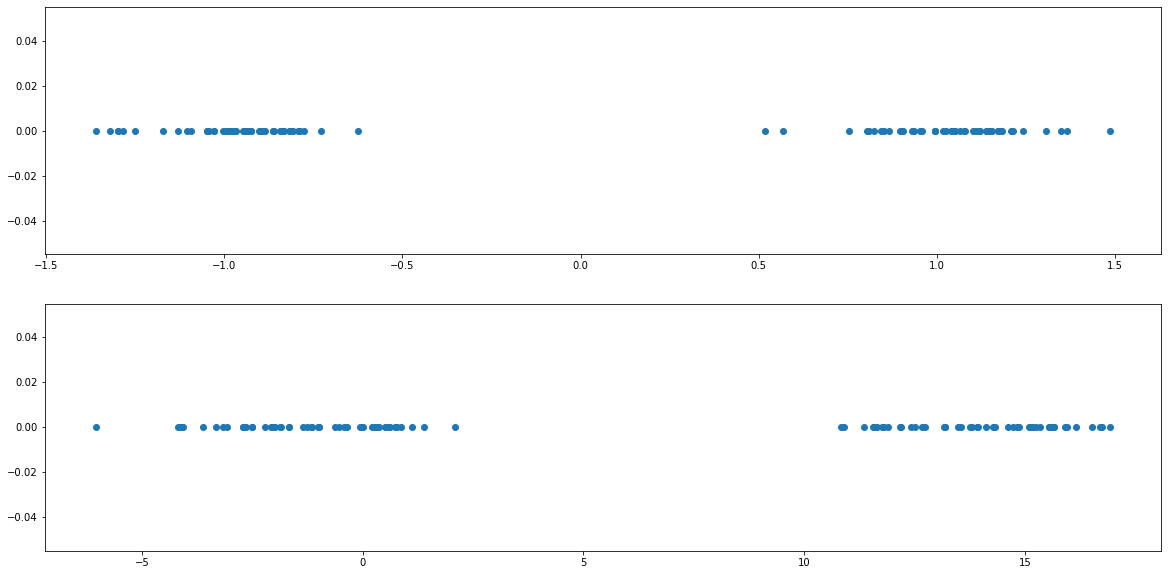

In [140]:
X,y = randomGaussians2(d=1, nper=50, scaling=0.2)


tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X)


fig, axs = plt.subplots(2, figsize=(20,10))
axs[0].scatter(X[:,0], [0]*len(X))
axs[1].scatter(X_tsne[:,0], [0]*len(X))